# 1. LIBRARIES AND FUNCTIONS

# 1.1 Import Libraries

In [120]:
#Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

#Modelling algotithm
from sklearn import cluster

#Data scaler
from sklearn.preprocessing import MinMaxScaler

#Model evaluation
from sklearn.metrics import silhouette_score

#Datetime
import datetime as dt

#Warnings
import warnings
warnings.filterwarnings('ignore')

# 1.2 Create Functions

In [121]:
#Outlier handling function
def get_iqr(x):
    q1 = np.percentile(a=x, q=25)
    q3 = np.percentile(a=x, q=75)
    iqr = q3-q1
    lower_limit = q1-(1.5*iqr)
    upper_limit = q3+(1.5*iqr)
    return lower_limit, upper_limit

In [122]:
def get_outliers(x):
    lower_limit, upper_limit = get_iqr(x)
    return x[np.where((x>lower_limit) | (x<upper_limit))]

In [123]:
def drop_outlier(x,y):
    lower_limit, upper_limit = get_iqr(x[y])
    x = x[((x[y]>lower_limit) & (x[y]<upper_limit))]
    return

In [124]:
def to_datetime(x):
    x = pd.to_datetime(arg=x, format='%Y-%m-%d %H:%M:%S')

In [125]:
#Define plot distribution
def plot_dist(data, title, axlabel):
    sns.distplot(a=data, axlabel=axlabel)
    plt.axvline(x=data.mean(), ymax=0.95, c='green')
    plt.axvline(x=data.median(), ymax=0.95, c='orange')
    plt.axvline(x=data.describe()[4], ymax=0.95, c='yellow')
    plt.axvline(x=data.decribe()[6], ymax=0.95, c='red')
    plt.title(title)
    plt.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])
    return

In [126]:
#Define plot distribution subplot
def plot_dist_subplot(data, title, axlabel, ax):
    plt.figure(figsize=(12,6))
    sns.distplot(x=data, axlabel=axlabel, ax=ax)
    plt.axvline(x=data.mean(), ymax=0.95, c='green')
    plt.axvline(x=data.median(), ymax=0.95, c='orange')
    plt.axvline(x=data.describe()[4], ymax=0.95, c='yellow')
    plt.axvline(x=data.describe()[6], ymax=0.95, c='red')
    plt.title(title)
    plt.legend(labels=['mean', 'median', '1st quatile', '3rd quartile'])
    return

# 2. DATA UNDERSTANDING

The Olist store is an e-commerce business headquartered in Sao Paulo, Brazil. This firm acts as a single point of contact between various small businesses and the customers who wish to buy their products.

The scope of this analysis focuses more on the seller side (B2B) of Olist. With a given dataset, we will conduct the analysis that can bring some helpful insights into Olist’s B2B marketing team.

Olist has released a Marketing Funnel Dataset from sellers that filled-in requests of contact to sell their products on Olist Store. The dataset has information of 8k Marketing Qualified Leads (MQLs) that requested contact between Jun. 1st 2017 and Jun 1st 2018. They were randomly sampled from the total of MQLs.

The MQL data is provided from 2017-06-14 to 2018-05-31, while the won MQL data is provided from closed deal data ranging from 2017-12-05 to 2018-11-14. In 2017, MQLs that Olist marketing team generated is around 400 MQLs/month. In 2018, they boost the number to 1000–1400 leads per month. Regarding the won MQL, its peak was at 05/2018 with 200 won opportunities.

This is real data, it has been anonymized and sampled from the original dataset.

## 2.1 Marketing Qualified Leads Dataset 

[What is a Marketing Qualified Lead?](https://www.blendb2b.com/blog/what-is-a-marketing-qualified-lead-really#:~:text=In%20B2B%20marketing%2C%20a%20Marketing,to%20use%20for%20this%20purpose.)

In B2B marketing, a Marketing Qualified Lead (MQL) is typically one that marketing feels is ready to be passed to sales.


MQL data consist of 8000 rows and 4 columns as follows:


1.   mql_id : Marketing Qualified Lead id
2.   first_contact_date : Date of the first contact solicitation
3.   landing_page_id : Landing page id where the lead was acquired
4.   origin : Type of media where the lead was acquired

This data ranging from 2017-06-14 to 2018-05-31.

In [127]:
df = pd.read_csv('dataset from python script/olist_marketing_qualified_leads_dataset.csv - olist_marketing_qualified_leads_dataset.csv', )
df.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [128]:
len(df)

8000

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [130]:
df.isna().sum()

mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64

In [131]:
df.describe().T

,count,unique,top,freq
mql_id,8000,8000,dac32acd4db4c29c230538b72f8dd87d,1
first_contact_date,8000,336,2018-05-02,93
landing_page_id,8000,495,b76ef37428e6799c421989521c0e5077,912
origin,7940,10,organic_search,2296


### 2.1.1 mql_id 

`mql_id` column consist of 8000 rows and there's no duplicate value

In [132]:
df['mql_id'].duplicated().sum()

0

### 2.1.2 first_contact_date 

`first_contact_date` column is the first contact solicitation date. It is an object typed data, this data required to be previously converted as datetime. After converted, the data implied that the latest first contact date is on 31 may 2018 and earliest first contact date is on 14 June 2017. This time range might needed to be selected first since the closed deal time range is from 2017.

In [133]:
max(df['first_contact_date'])

'2018-05-31'

In [134]:
min(df['first_contact_date'])

'2017-06-14'

### 2.1.3 landing_page_id 

Olist used 495 landing pages to capture MQLs. Even though the sales team is responsible for converting an MQL into a won opportunity, the marketing team can affect this likelihood from the top of the funnel by providing relevant messaging and benefits on the landing pages.

The type of landing page for olist is assumend as lead generation landing page. Lead generation landing pages used to collect prospective customer data. Mainly, data in the form of names and email addresses. Both of these data will then be stored and used by the business to maintain relationships with potential customers.

### 2.1.4 origin 

[Olist Traffic Source
](https://www.swiftlocalsolutions.com/blog/what-is-the-difference-between-direct-and-organic-sources-of-website-traffic#:~:text=Organic%20Search%3A%20Traffic%20for%20which,or%2C%20of%20course%2C%20Facebook.)

1. **Social** : Traffic for which the referring site is a social media platform like Instagram, Twitter, Pinterest or, of course, Facebook.
2. **Paid search** : Traffic that comes from a paid search campaign, referred to as Cost per Click (CPC) or Pay per Click (PPC).
3. **Organic search** : Traffic for which the referring site is a search engine like Google or Bing but wasn’t from a paid ad on those search pages.
4. **Email** :  Traffic for which the referring website URL page is tagged as “email”. This could include traffic from an email newsletter.
5. **Referral** : Traffic sent from one website to another, through a direct link. This kind of traffic includes affiliates, content partners, and traffic from direct media buying or news coverage.
6. **direct traffic** :  Traffic sent from users that directly entered a URL into a browser saved bookmarks or any links from outside the browser (ex: app).Direct traffic will often come from people with an awareness of, or affinity for, a given site. Thus, visitors from Direct are likely to be amongst some of the website's most loyal and engaged users.
7. **Display**: Traffic that originated from a paid banner ad campaign. This might be referred to as CPM (Cost per Mille (thousand)) or banner ads

In [135]:
list_origin = df['origin'].unique().tolist()
print(list_origin)

['social', 'paid_search', 'organic_search', 'email', 'unknown', 'referral', 'direct_traffic', 'display', nan, 'other_publicities', 'other']


In [136]:
df['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

In [137]:
df_social = df[df['origin'] == 'social'][['landing_page_id', 'origin']]
df_paid_search = df[df['origin'] == 'paid_search'][['landing_page_id', 'origin']]
df_organic_search = df[df['origin'] == 'organic_search'][['landing_page_id', 'origin']]
df_email = df[df['origin'] == 'email'][['landing_page_id', 'origin']]
df_unknown = df[df['origin'] == 'unknown'][['landing_page_id', 'origin']]
df_referral = df[df['origin'] == 'referral'][['landing_page_id', 'origin']]
df_direct_traffic = df[df['origin'] == 'direct_traffic'][['landing_page_id', 'origin']]
df_display = df[df['origin'] == 'display'][['landing_page_id', 'origin']]
df_other_publicities = df[df['origin'] == 'other_publicities'][['landing_page_id', 'origin']]
df_other = df[df['origin'] == 'other'][['landing_page_id', 'origin']]

In [138]:
organic_search = df_organic_search.drop_duplicates(subset='landing_page_id', keep=False)
paid_search = df_paid_search.drop_duplicates(subset='landing_page_id', keep=False)
social = df_social.drop_duplicates(subset='landing_page_id', keep=False)
unknown = df_unknown.drop_duplicates(subset='landing_page_id', keep=False)
direct_traffic = df_direct_traffic.drop_duplicates(subset='landing_page_id', keep=False)
email = df_email.drop_duplicates(subset='landing_page_id', keep=False)
referral = df_referral.drop_duplicates(subset='landing_page_id', keep=False)
other = df_other.drop_duplicates(subset='landing_page_id', keep=False)
display = df_display.drop_duplicates(subset='landing_page_id', keep=False)
other_publicities = df_other_publicities.drop_duplicates(subset='landing_page_id', keep=False)

In [139]:
len(social)

61

In [140]:
join = paid_search.merge(right=organic_search, on='landing_page_id')

In [141]:
join

,landing_page_id,origin_x,origin_y
0,fd660f5d9a62d444c76191307b3a0514,paid_search,organic_search
1,60ea0bbb4ee471b6b99e8b892847a8db,paid_search,organic_search
2,fa6f59a21825d841e307151460fb0302,paid_search,organic_search
3,3fd71e7e6cf64921740567dcfefb68cf,paid_search,organic_search
4,acd502dc52a068d7c4014af6d5dbcd11,paid_search,organic_search
5,447cabeecc99dc245cb42be7122cba9e,paid_search,organic_search
6,2b3ba77df5d7657e8c515a1c74155b99,paid_search,organic_search
7,6265f632e27ca4d14268e0cb91ebc4a4,paid_search,organic_search
8,cf747f07a385ddb157f79df52898ab14,paid_search,organic_search
9,16d718d40146b50ca7a8a045f1b06834,paid_search,organic_search


In [142]:
join2 = pd.merge(left=join, right=email, on='landing_page_id', how='inner')

In [143]:
join2

,landing_page_id,origin_x,origin_y,origin
0,3fd71e7e6cf64921740567dcfefb68cf,paid_search,organic_search,email
1,b8cc49b19db5de8ec30f938aa3d916a9,paid_search,organic_search,email


On the unique `landing_page_id`, it doesn't show any similarities to the origin. Indicates that the `landing_page_id` is not determined from where the leads traffic source comes from.

### 2.1.5 Insight and Data Cleaning Issue from MQL Data

1. There is no duplicate value in `mql_id`
2. `first_contact_date` must be datetime format
3. The earliest first contact date is 2017-06-14
4. The latest first contact date is 2018-05-31
5. There is 7050 duplicate and 495 unique value in `landing_page_id`. The reason why this variable consist of many duplicate values, because olist used 495 landing pages to capture MQLs. We assume that the unique `landing_page_id` includes data from active and archived landing pages. Similar landing_page_id  not determined from where the leads traffic source comes from.
6. `origin` has 60 missing values
7. Olist has 7 `origin` that can be explaine as common traffic source in website. It indicated that the other origins can be convert as unknown origin.

## 2.2 Closed Deal Dataset 

[Closed Deal??](https://rev.team/kb/what-is-closing-a-deal)

As deals rarely ever close themselves, they usually require efforts on the part of salespersons. The process of closing a deal can be a real challenge, especially for less experienced salespersons, often facing the potentially frustrating effects of deal rejection as well. This is why **sales teams often invest a lot of time and effort into developing and improving their deal closing strategies**.

closed deal dataset contains 842 observations with 14 variables. Each observation is a won deal of Olist which consists of the mql_id of the merchant, seller_id (used in Olist platform), sdr_id and sr_id(the sales development representative and sales representative that were in charge of the deal), won_date, business segment, lead_type, lead_behaviour_profile, business_type, declared_monthly_revenue. Among these, 5 variables have too many Null values that they cannot bring value to the analysis. closed deal data ranging from 2017-12-05 to 2018-11-14.

In [144]:
df2 = pd.read_csv('dataset from python script/olist_closed_deals_dataset - olist_closed_deals_dataset.csv')
df2.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0


In [145]:
df2.shape

(842, 14)

In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [147]:
data = []

def check(x):
    for i in x.columns:
        data.append([x[i].dtype, len(x[i]), x[i].isna().sum(), x[i].duplicated().sum(), x[i].nunique()])
    return pd.DataFrame(columns=['dataType', 'len', 'null', 'duplicate', 'unique'], data=data, index=x.columns)

In [148]:
check(df2)

,dataType,len,null,duplicate,unique
mql_id,object,842,0,0,842
seller_id,object,842,0,0,842
sdr_id,object,842,0,810,32
sr_id,object,842,0,820,22
won_date,object,842,0,18,824
business_segment,object,842,1,808,33
lead_type,object,842,6,833,8
lead_behaviour_profile,object,842,177,832,9
has_company,object,842,779,839,2
has_gtin,object,842,778,839,2


### 2.2.5 won_date 

In [149]:
print('Latest Date :', max(df2['won_date']))
print('Earliest Date :', min(df2['won_date']))

Latest Date : 2018-11-14 18:04:19
Earliest Date : 2017-12-05 02:00:00


### 2.2.6 business_segment 

In [150]:
list_business_segment = df2['business_segment'].unique().tolist()
print(list_business_segment)

['pet', 'car_accessories', 'home_appliances', 'food_drink', 'health_beauty', 'computers', 'household_utilities', 'construction_tools_house_garden', 'toys', 'sports_leisure', 'food_supplement', 'home_decor', 'bed_bath_table', 'watches', 'fashion_accessories', 'jewerly', 'party', 'small_appliances', 'audio_video_electronics', 'bags_backpacks', 'home_office_furniture', 'music_instruments', 'books', 'stationery', 'baby', 'air_conditioning', 'phone_mobile', nan, 'handcrafted', 'perfume', 'gifts', 'religious', 'games_consoles', 'other']


In [151]:
df2['business_segment'].value_counts()

home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bed_bath_table                      22
bags_backpacks                      22
toys                                20
fashion_accessories                 19
home_office_furniture               14
stationery                          13
phone_mobile                        13
small_appliances                    12
handcrafted                         12
baby                                10
music_instruments                    9
books                                9
jewerly                              8
watches                              8
home_appliances          

### 2.2.7 lead_type

In [152]:
list_lead_type = df2['lead_type'].unique().tolist()
print(list_lead_type)

['online_medium', 'industry', 'online_big', 'online_small', 'offline', 'online_top', 'online_beginner', nan, 'other']


In [153]:
df2['lead_type'].value_counts()

online_medium      332
online_big         126
industry           123
offline            104
online_small        77
online_beginner     57
online_top          14
other                3
Name: lead_type, dtype: int64

### 2.2.8 lead_behaviour_profile 

`lead_behaviour_profile` is related to DISC personality test. Each type has the meaning as follows.
_* Source: [DISC Profile](https://www.discprofile.com/what-is-disc/overview/)_

Behaviour_profile | DISC_profile | Description
------------------- | ------------- | ------------
Cat | Steadiness | Person places emphasis on cooperation, sincerity, dependability
Eagle | Influence | Person places emphasis on influencing or persuading others, openness, relationships
Wolf | Conscientiousness | Person places emphasis on quality and accuracy, expertise, competency
Shark | Dominance | Person places emphasis on accomplishing results, the bottom line, confidence

In [154]:
list_lead_behaviour_profile = df2['lead_behaviour_profile'].unique().tolist()
print(list_lead_behaviour_profile)

['cat', 'eagle', nan, 'wolf', 'shark', 'eagle, wolf', 'cat, wolf', 'shark, cat', 'eagle, cat', 'shark, wolf']


In [155]:
df2['lead_behaviour_profile'].value_counts()

cat            407
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, wolf      3
eagle, cat       3
shark, cat       1
shark, wolf      1
Name: lead_behaviour_profile, dtype: int64

### 2.2.9 business_type 

In [156]:
list_business_type = df2['business_type'].unique().tolist()
print(list_business_type)

['reseller', 'manufacturer', nan, 'other']


In [157]:
df2['business_type'].value_counts()

reseller        587
manufacturer    242
other             3
Name: business_type, dtype: int64

### 2.2.10 Insight and Data Cleaning Issue from Closed Deal Data

1. Number of duplicate values in `mql_id` = 0
2. Number of duplicate values in `seller_id` = 0
3. Olist has 32 sales development representative
4. Olist has 22 sales representative
5. Latest won date is 2018-11-14 18:04:19, earliest won date is 2018-11-14 18:04:19
6. Olist has 33 number of business segment (include `other` and `NaN` values)
7. There is 8 lead_type (include `other` and `NaN` values)
8. Lead has 8 category and combination of behaviour profile (exclude `NaN `values)
9. Olist seller only has 2 define business_type(reseller and manufacturer)
10. There is small number of missing value in business_segment, lead_behaviour_profile,and business_type
11. There is large number of missing value in `has_company`, `has_gtin`, `average_stock`, `declared_product_catalog_size` (will be drop) 

# 2. Data Cleaning

## 2.1 Variable Handling 

In [158]:
df.dtypes

mql_id                object
first_contact_date    object
landing_page_id       object
origin                object
dtype: object

In [159]:
df['first_contact_date'].head()

0    2018-02-01
1    2017-10-20
2    2018-03-22
3    2018-01-22
4    2018-02-21
Name: first_contact_date, dtype: object

In [160]:
df['first_contact_date'] = pd.to_datetime(arg=df['first_contact_date'])#, format='%Y-%m-%d')

In [161]:
df.dtypes

mql_id                        object
first_contact_date    datetime64[ns]
landing_page_id               object
origin                        object
dtype: object

In [162]:
df['first_contact_date'].head()

0   2018-02-01
1   2017-10-20
2   2018-03-22
3   2018-01-22
4   2018-02-21
Name: first_contact_date, dtype: datetime64[ns]

In [163]:
df2.dtypes

mql_id                            object
seller_id                         object
sdr_id                            object
sr_id                             object
won_date                          object
business_segment                  object
lead_type                         object
lead_behaviour_profile            object
has_company                       object
has_gtin                          object
average_stock                     object
business_type                     object
declared_product_catalog_size    float64
declared_monthly_revenue           int64
dtype: object

In [164]:
df2['won_date'].head()

0    2018-02-26 19:58:54
1    2018-05-08 20:17:59
2    2018-06-05 17:27:23
3    2018-01-17 13:51:03
4    2018-07-03 20:17:45
Name: won_date, dtype: object

In [165]:
df2['won_date'] = pd.to_datetime(arg=df2['won_date'])#, format='%Y-%m-%d %H:%M:%S')

In [166]:
df2.dtypes

mql_id                                   object
seller_id                                object
sdr_id                                   object
sr_id                                    object
won_date                         datetime64[ns]
business_segment                         object
lead_type                                object
lead_behaviour_profile                   object
has_company                              object
has_gtin                                 object
average_stock                            object
business_type                            object
declared_product_catalog_size           float64
declared_monthly_revenue                  int64
dtype: object

In [167]:
df2['won_date'].head()

0   2018-02-26 19:58:54
1   2018-05-08 20:17:59
2   2018-06-05 17:27:23
3   2018-01-17 13:51:03
4   2018-07-03 20:17:45
Name: won_date, dtype: datetime64[ns]

## 2.2 Duplicate Value Handling 

In [168]:
df['mql_id'].duplicated().sum()

0

In [169]:
df2['seller_id'].duplicated().sum()

0

No duplicated data is required to be imputed, `mql_id` on mql data is unique, also `seller_id` on closed_deal data is unique.

## 2.4 Feature Addition 

### 2.4.1 Add first_contact_month 

In [170]:
#Defining first_contact_month
first_contact_month = df['first_contact_date'].dt.to_period('M').astype(str)
first_contact_month.head()

0    2018-02
1    2017-10
2    2018-03
3    2018-01
4    2018-02
Name: first_contact_date, dtype: object

In [171]:
#Adding first_contact_month
df.insert(loc=2, column='first_contact_month', value=first_contact_month.values)

In [172]:
df.head()

,mql_id,first_contact_date,first_contact_month,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,2018-02,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,2017-10,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,2018-03,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,2018-01,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,2018-02,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [173]:
df['first_contact_month'].dtype

dtype('O')

### 2.4.2 Add close_date 

In [174]:
#Defining close_date without hour
print(df2['won_date'].head(), '\n')
close_date = df2['won_date'].dt.date
print(close_date, '\n')
close_date = pd.to_datetime(close_date)
print(close_date)

0   2018-02-26 19:58:54
1   2018-05-08 20:17:59
2   2018-06-05 17:27:23
3   2018-01-17 13:51:03
4   2018-07-03 20:17:45
Name: won_date, dtype: datetime64[ns] 

0      2018-02-26
1      2018-05-08
2      2018-06-05
3      2018-01-17
4      2018-07-03
          ...    
837    2018-08-20
838    2018-08-23
839    2018-11-09
840    2018-09-24
841    2018-10-24
Name: won_date, Length: 842, dtype: object 

0     2018-02-26
1     2018-05-08
2     2018-06-05
3     2018-01-17
4     2018-07-03
         ...    
837   2018-08-20
838   2018-08-23
839   2018-11-09
840   2018-09-24
841   2018-10-24
Name: won_date, Length: 842, dtype: datetime64[ns]


In [175]:
#Adding close_date
df2.insert(loc=5, column='close_date', value=close_date.values)

In [176]:
df2.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,2018-06-05,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,2018-07-03,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0


### 2.4.3 Add won_month 

In [177]:
df2['won_date'].head()

0   2018-02-26 19:58:54
1   2018-05-08 20:17:59
2   2018-06-05 17:27:23
3   2018-01-17 13:51:03
4   2018-07-03 20:17:45
Name: won_date, dtype: datetime64[ns]

In [178]:
#Defining won_month
won_month = df2['won_date'].dt.to_period('M').astype(str)
won_month.head()

0    2018-02
1    2018-05
2    2018-06
3    2018-01
4    2018-07
Name: won_date, dtype: object

In [179]:
#Adding won_month
df2.insert(loc=6, column='won_month', value=won_month.values)
df2.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,2018-02,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,2018-05,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,2018-06-05,2018-06,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,2018-07-03,2018-07,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0


In [180]:
df2['won_month'].dtype

dtype('O')

### 2.4.4 Add won_date 

In [181]:
#Defining won_time
won_time = df2['won_date'].dt.strftime('%H').astype(int)
won_time.head()

0    19
1    20
2    17
3    13
4    20
Name: won_date, dtype: int32

In [182]:
df2.insert(loc=7, column='won_time', value=won_time.values)
df2.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,2018-02,19,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,2018-05,20,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,2018-06-05,2018-06,17,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,13,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,2018-07-03,2018-07,20,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0


## 2.3 Irrelevant Value Handling 

In [183]:
df2.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date', 'close_date',
       'won_month', 'won_time', 'business_segment', 'lead_type',
       'lead_behaviour_profile', 'has_company', 'has_gtin', 'average_stock',
       'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue'],
      dtype='object')

In [184]:
df2.nunique()

mql_id                           842
seller_id                        842
sdr_id                            32
sr_id                             22
won_date                         824
close_date                       191
won_month                         12
won_time                          17
business_segment                  33
lead_type                          8
lead_behaviour_profile             9
has_company                        2
has_gtin                           2
average_stock                      6
business_type                      3
declared_product_catalog_size     33
declared_monthly_revenue          27
dtype: int64

In [185]:
#Removing irrelevant columns in df2 dataset
irr_col = ['has_company', 'has_gtin', 'average_stock', 'declared_product_catalog_size', 'declared_monthly_revenue']
close = df2.copy()
close.drop(labels=irr_col, axis=1, inplace=True)
close.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,business_type
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,2018-02,19,pet,online_medium,cat,reseller
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,2018-05,20,car_accessories,industry,eagle,reseller
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,2018-06-05,2018-06,17,home_appliances,online_big,cat,reseller
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,13,food_drink,online_small,NaN,reseller
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,2018-07-03,2018-07,20,home_appliances,industry,wolf,manufacturer


In [186]:
print(close.shape)
print(close[close['won_month']>='2018-06'].shape)
print(close[close['won_month']<'2018-06'].shape)
print(df.shape)
print(df[df['first_contact_month']<='2017-11'].shape)
print(df[df['first_contact_month']>'2017-11'].shape)

(842, 12)
(177, 12)
(665, 12)
(8000, 5)
(1802, 5)
(6198, 5)


In [187]:
close = close[close['won_month']<'2018-06']
mql = df[df['first_contact_month']>'2017-11']

In [188]:
print(close.shape)
print(mql.shape)

(665, 12)
(6198, 5)


## 2.5 Missing Handling Values 

### 2.5.1 origin 

In [189]:
mql.isna().sum()

mql_id                  0
first_contact_date      0
first_contact_month     0
landing_page_id         0
origin                 51
dtype: int64

In [190]:
mql_null = mql[mql['origin'].isna()]

In [191]:
mql_null = mql_null.groupby(by=mql_null['first_contact_month'], as_index=False)['mql_id'].count()
mql_null

,first_contact_month,mql_id
0,2017-12,3
1,2018-01,5
2,2018-02,7
3,2018-03,9
4,2018-04,13
5,2018-05,14


In [192]:
mql_count = mql.copy()

In [193]:
mql_count = mql_count.groupby(by=mql_count['first_contact_month'])['mql_id'].count()
mql_count

first_contact_month
2017-12     200
2018-01    1141
2018-02    1028
2018-03    1174
2018-04    1352
2018-05    1303
Name: mql_id, dtype: int64

In [194]:
percentNull_mql = mql_null.merge(right=mql_count, how='outer', on='first_contact_month')
percentNull_mql

,first_contact_month,mql_id_x,mql_id_y
0,2017-12,3,200
1,2018-01,5,1141
2,2018-02,7,1028
3,2018-03,9,1174
4,2018-04,13,1352
5,2018-05,14,1303


In [195]:
percentNull_mql['percentage'] = round(percentNull_mql['mql_id_x']/percentNull_mql['mql_id_y'],4)
percentNull_mql.sort_values('first_contact_month', ascending=False)

,first_contact_month,mql_id_x,mql_id_y,percentage
5,2018-05,14,1303,0.0107
4,2018-04,13,1352,0.0096
3,2018-03,9,1174,0.0077
2,2018-02,7,1028,0.0068
1,2018-01,5,1141,0.0044
0,2017-12,3,200,0.0150


In [196]:
mql['origin'].unique()

array(['social', 'organic_search', 'email', 'unknown', 'paid_search',
       'referral', 'direct_traffic', 'display', nan, 'other_publicities',
       'other'], dtype=object)

In [197]:
mql['origin'].replace(to_replace=[np.nan, 'other'], value='unknown', inplace=True)

In [198]:
mql['origin'].unique()

array(['social', 'organic_search', 'email', 'unknown', 'paid_search',
       'referral', 'direct_traffic', 'display', 'other_publicities'],
      dtype=object)

### 2.5.2 business_segment 

In [199]:
businessSegment_null = close[close['business_segment'].isna()]
businessSegment_null

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,business_type


In [200]:
close['business_segment'].nunique()

31

### 2.5.3 lead_type 

In [201]:
leadType_null = close[close['lead_type'].isna()]
leadType_null

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,business_type
424,d73084414361442cb1fd4d659b395c38,2ba91c7ad80ff88b23b7db823b43c233,068066e24f0c643eb1d089c7dd20cd73,495d4e95a8cf8bbf8b432b612a2aa328,2018-01-18 11:22:24,2018-01-18,2018-01,11,pet,NaN,NaN,reseller
426,ab712090eb9a27881b63080c859147de,18d5b01a5ca858cf540df954e063978d,068066e24f0c643eb1d089c7dd20cd73,9ae085775a198122c5586fa830ff7f2b,2018-02-02 16:44:11,2018-02-02,2018-02,16,audio_video_electronics,NaN,NaN,reseller
566,8257329475414b1eaf3dc731440e01a7,ba90964cff9b9e0e6f32b23b82465f7b,56bf83c4bb35763a51c2baab501b4c67,c638112b43f1d1b86dcabb0da720c901,2018-02-09 17:10:58,2018-02-09,2018-02,17,small_appliances,NaN,cat,reseller
785,245710681d51a6dfb80ab06683f3be01,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,2018-05-07,2018-05,21,computers,NaN,NaN,reseller


In [202]:
leadType_null = leadType_null.groupby(by=leadType_null['won_month'], as_index=False)['mql_id'].count()
leadType_null

,won_month,mql_id
0,2018-01,1
1,2018-02,2
2,2018-05,1


In [203]:
close_count = close.groupby(by=close['won_month'])['mql_id'].count()
close_count

won_month
2017-12      3
2018-01     73
2018-02    113
2018-03    147
2018-04    207
2018-05    122
Name: mql_id, dtype: int64

In [204]:
percent = leadType_null.merge(right=close_count, how='inner', on='won_month')
percent

,won_month,mql_id_x,mql_id_y
0,2018-01,1,73
1,2018-02,2,113
2,2018-05,1,122


In [205]:
close['lead_type'].unique()

array(['online_medium', 'industry', 'online_small', 'offline',
       'online_big', 'online_beginner', 'online_top', nan], dtype=object)

In [206]:
close['lead_type'].replace(to_replace=np.nan, value='other', inplace=True)

In [207]:
close['lead_type'].unique()

array(['online_medium', 'industry', 'online_small', 'offline',
       'online_big', 'online_beginner', 'online_top', 'other'],
      dtype=object)

In [208]:
close['lead_type'].isna().sum()

0

### 2.5.4 lead_behaviour_profile 

In [209]:
leadBehaviourProfile_null = close[close['lead_behaviour_profile'].isna()]
leadBehaviourProfile_null

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,business_type
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,13,food_drink,online_small,NaN,reseller
5,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,2018-02-07,2018-02,18,health_beauty,online_medium,NaN,manufacturer
16,9878253904482726e741460a99adba86,92d46311e4fa7583d14c351fdc881af6,de63de0d10a6012430098db33c679b0b,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-26 17:23:46,2018-01-26,2018-01,17,food_supplement,industry,NaN,manufacturer
19,1f4e960dc47c49ab5c2a495e00055f64,8c45b4bc4b5c1e2a4e789b4466a39b77,56bf83c4bb35763a51c2baab501b4c67,c638112b43f1d1b86dcabb0da720c901,2018-02-07 13:57:02,2018-02-07,2018-02,13,bed_bath_table,offline,NaN,reseller
21,0b97be8b4b408a3a0780a32e0a143a7f,7d13fca15225358621be4086e1eb0964,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,2018-02-08,2018-02,17,watches,online_big,NaN,reseller
...,...,...,...,...,...,...,...,...,...,...,...,...
780,ee24544795bf59a8343731c3501c6b4e,c013e57c075a06e5b5c48ee03c525719,fdb16d3cbbeb5798f2f66c4096be026d,9ae085775a198122c5586fa830ff7f2b,2018-02-01 17:10:20,2018-02-01,2018-02,17,pet,online_medium,NaN,reseller
785,245710681d51a6dfb80ab06683f3be01,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,2018-05-07,2018-05,21,computers,other,NaN,reseller
786,512f3a7ea5520eae3b54a77c0497489e,2a1a7b9bb186aba4e126ec76f9607237,9ae085775a198122c5586fa830ff7f2b,c638112b43f1d1b86dcabb0da720c901,2017-12-05 02:00:00,2017-12-05,2017-12,2,computers,offline,NaN,reseller
788,f8e1b8b3a3fe9b27a64dfcaaa8fc6054,b6392ab5fdb153fb3c6c7c0e174cdc29,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-04 20:33:19,2018-04-04,2018-04,20,audio_video_electronics,online_medium,NaN,reseller


In [210]:
leadBehaviourProfile_null = leadBehaviourProfile_null.groupby(by=leadBehaviourProfile_null['won_month'])['mql_id'].count()
leadBehaviourProfile_null

won_month
2017-12     3
2018-01    73
2018-02    61
2018-03    16
2018-04     9
2018-05     4
Name: mql_id, dtype: int64

In [211]:
close_count = pd.DataFrame(close_count).reset_index()

In [212]:
percent_leadBP = close_count.merge(right=leadBehaviourProfile_null, how='outer', on='won_month')
percent_leadBP

,won_month,mql_id_x,mql_id_y
0,2017-12,3,3
1,2018-01,73,73
2,2018-02,113,61
3,2018-03,147,16
4,2018-04,207,9
5,2018-05,122,4


In [213]:
close['lead_behaviour_profile'].unique()

array(['cat', 'eagle', nan, 'wolf', 'shark'], dtype=object)

In [214]:
close['lead_behaviour_profile'].value_counts()

cat      324
eagle    101
wolf      59
shark     15
Name: lead_behaviour_profile, dtype: int64

In [215]:
close['lead_behaviour_profile'].describe()

count     499
unique      4
top       cat
freq      324
Name: lead_behaviour_profile, dtype: object

In [216]:
close['lead_behaviour_profile'].replace(to_replace=np.nan, value='unknown', inplace=True)

In [217]:
close['lead_behaviour_profile'].isna().sum()

0

In [218]:
close['lead_behaviour_profile'].value_counts()

cat        324
unknown    166
eagle      101
wolf        59
shark       15
Name: lead_behaviour_profile, dtype: int64

### 2.5.5 business_type 

In [219]:
businessType_null = close[close['business_type'].isna()]
businessType_null

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,business_type
223,0b32d6a87c09c32b3cd90dfd5ef5699f,4dd7866cf496e0c2fcfc93a4589dc1be,a8387c01a09e99ce014107505b92388c,2695de1affa7750089c0455f8ce27021,2018-04-27 14:04:06,2018-04-27,2018-04,14,fashion_accessories,online_medium,cat,NaN
249,0338bf13624f52beaca91ec4a23c860c,667ee4b0aece58908fae3fd1649b7e6c,9d12ef1a7eca3ec58c545c678af7869c,495d4e95a8cf8bbf8b432b612a2aa328,2018-04-30 13:30:05,2018-04-30,2018-04,13,handcrafted,online_medium,eagle,NaN
309,9e7f111f15db1aa3830cd806660d7b97,80b2f7568a7016771f58c5b981da3ae3,370c9f455f93a9a96cbe9bea48e70033,d3d1e91a157ea7f90548eef82f1955e3,2018-05-21 17:29:17,2018-05-21,2018-05,17,health_beauty,industry,shark,NaN
375,0d6080ffaadf8f8fd9648afb791c29c2,83c465a786b06574376909b35ef6752a,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-04-23 19:26:30,2018-04-23,2018-04,19,handcrafted,offline,eagle,NaN
412,dca7085d5af68e91d19ed7cb75e1dd86,54212aa507a8696b0766046bd3aecdc3,4b339f9567d060bcea4f5136b9f5949e,6565aa9ce3178a5caf6171827af3a9ba,2018-03-15 12:43:46,2018-03-15,2018-03,12,jewerly,industry,cat,NaN
444,b2fb7865dfca2461177cbad7ec520b0e,e1c76f339ebd5460999f25a2aa8c92c5,56bf83c4bb35763a51c2baab501b4c67,c638112b43f1d1b86dcabb0da720c901,2018-02-08 17:10:00,2018-02-08,2018-02,17,small_appliances,online_medium,unknown,NaN
449,f593b9ead8801922f74f0a5329e31486,e157c96a8e7711636119c6af8e7cf85f,068066e24f0c643eb1d089c7dd20cd73,c638112b43f1d1b86dcabb0da720c901,2018-02-26 14:46:28,2018-02-26,2018-02,14,sports_leisure,online_medium,cat,NaN
505,28f36aa85fbadc0663c2df15a5af35db,455befea1bb853c75ccbca94cff26e5c,f42a2bd194f7802ab052a815c8de65b7,de63de0d10a6012430098db33c679b0b,2018-04-20 16:29:28,2018-04-20,2018-04,16,phone_mobile,offline,cat,NaN
762,3434cfa4a17f019a5aae78ee0bec24bf,9ba337a47628f9761b6bb3939a3f97a9,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-26 14:44:04,2018-02-26,2018-02,14,home_decor,industry,eagle,NaN


In [220]:
businessType_null = businessType_null.groupby(by=close['won_month'])['mql_id'].count()
businessType_null

won_month
2018-02    3
2018-03    1
2018-04    4
2018-05    1
Name: mql_id, dtype: int64

In [221]:
percent_businessType = close_count.merge(right=businessType_null, how='outer', on='won_month')
percent_businessType

,won_month,mql_id_x,mql_id_y
0,2017-12,3,NaN
1,2018-01,73,NaN
2,2018-02,113,3.0
3,2018-03,147,1.0
4,2018-04,207,4.0
5,2018-05,122,1.0


In [222]:
close['business_type'].unique()

array(['reseller', 'manufacturer', nan], dtype=object)

In [223]:
close['business_type'].replace(to_replace=np.nan, value='other', inplace=True)

In [224]:
close['business_type'].isna().sum()

0

# 2.6 Data Joining & Iterate Feature Addition

In [225]:
print(mql.shape)
print(close.shape)

(6198, 5)
(665, 12)


In [226]:
#Creating join mql dataset & close dataset
seller = close.merge(right=mql, how='left', on='mql_id')
seller.shape

(665, 16)

In [227]:
#Creating deal_length
deal_length = seller['close_date']-seller['first_contact_date']
deal_length = deal_length.dt.days
deal_length.shape

(665,)

In [228]:
seller.insert(loc=11, column='deal_length', value=deal_length.values)

In [229]:
seller.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,deal_length,business_type,first_contact_date,first_contact_month,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,2018-02,19,pet,online_medium,cat,5.0,reseller,2018-02-21,2018-02,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,2018-05,20,car_accessories,industry,eagle,34.0,reseller,2018-04-04,2018-04,2f08471dfb83baef522f952438a36f6e,referral
2,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,13,food_drink,online_small,unknown,3.0,reseller,2018-01-14,2018-01,22c29808c4f815213303f8933030604c,paid_search
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,2018-02-07,2018-02,18,health_beauty,online_medium,unknown,1.0,manufacturer,2018-02-06,2018-02,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,2018-04-16,2018-04,18,computers,online_medium,wolf,55.0,reseller,2018-02-20,2018-02,e492ee5eaf1697716985cc6f33f9cd9b,direct_traffic


In [230]:
seller.to_csv('seller.csv', index=False)

## 2.7 Outlier Handling 

<AxesSubplot:xlabel='deal_length'>

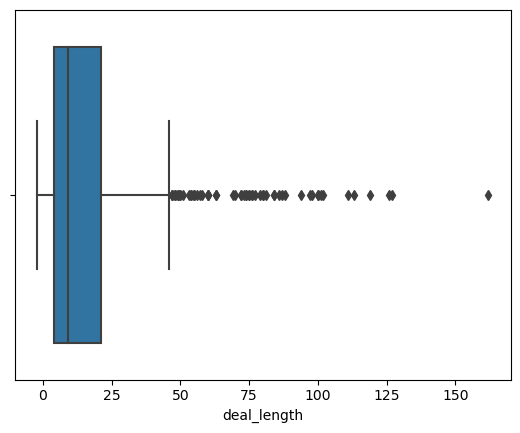

In [231]:
#Outlier on deal_length
sns.boxplot(x=seller['deal_length'])

In [232]:
seller['deal_length'].isna().sum()

25

In [233]:
seller[seller['deal_length']<=0].shape

(34, 17)

In [234]:
seller.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,close_date,won_month,won_time,business_segment,lead_type,lead_behaviour_profile,deal_length,business_type,first_contact_date,first_contact_month,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,2018-02-26,2018-02,19,pet,online_medium,cat,5.0,reseller,2018-02-21,2018-02,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,2018-05-08,2018-05,20,car_accessories,industry,eagle,34.0,reseller,2018-04-04,2018-04,2f08471dfb83baef522f952438a36f6e,referral
2,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,2018-01-17,2018-01,13,food_drink,online_small,unknown,3.0,reseller,2018-01-14,2018-01,22c29808c4f815213303f8933030604c,paid_search
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,2018-02-07,2018-02,18,health_beauty,online_medium,unknown,1.0,manufacturer,2018-02-06,2018-02,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,2018-04-16,2018-04,18,computers,online_medium,wolf,55.0,reseller,2018-02-20,2018-02,e492ee5eaf1697716985cc6f33f9cd9b,direct_traffic


In [235]:
x,y = get_iqr(seller['deal_length'].fillna(0))

print('Batas bawah :' ,x)
print('Batas atas  :' ,y)

Batas bawah : -20.0
Batas atas  : 44.0


In [236]:
seller = seller[seller['deal_length']>0]
seller.shape

(606, 17)

In [237]:
seller['deal_length'].describe()

count    606.000000
mean      18.339934
std       22.535774
min        1.000000
25%        5.000000
50%       10.000000
75%       22.000000
max      162.000000
Name: deal_length, dtype: float64

In [238]:
mql.to_csv('mql.csv', index=False)